In this notebook I'm going to look at the data from [**CelebA**](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset. Here I use **aligned and cropped** version of the dataset:
* Each image has the size of **178x218**.
* The face is located roughly in the **center** of the image and takes the most part of it.

To be able to execute the notebook please download the data by running corresponding bash script: 
```
cd ../stargan && 
./download.sh celeba
```

The goal of the notebook is to get the gist of the data and select classes to train on. It shows why the **hair** style is selected as the target of the model.

# Imports

Import necessary libraries

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Read attributes

CelebA dataset contains **40 face attributes** (such as hair color, lips form, etc.) for each image. There are **~200k images** in total. Let's read these attributes and look at them.

In [2]:
labels = pd.read_csv("../stargan/data/celeba/list_attr_celeba.txt", skiprows=1, delim_whitespace=True)

Exact number of images

In [3]:
len(labels)

202599

Example of data. `-1` here stands for the absent of feature while `1` means that the feature is presented in the image.

In [4]:
labels.head()

5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
000001.jpg                -1                1           1               -1   
000002.jpg                -1               -1          -1                1   
000003.jpg                -1               -1          -1               -1   
000004.jpg                -1               -1           1               -1   
000005.jpg                -1                1           1               -1   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  \
000001.jpg    -1     -1        -1        -1          -1          -1  ...   
000002.jpg    -1     -1        -1         1          -1          -1  ...   
000003.jpg    -1     -1         1        -1          -1          -1  ...   
000004.jpg    -1     -1        -1        -1          -1          -1  ...   
000005.jpg    -1     -1         1        -1          -1          -1  ...   

            Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
000001.jpg         -1        1              1         -1                 1   
000002.jpg         -1        1             -1         -1                -1   
000003.jpg         -1       -1             -1          1                -1   
000004.jpg         -1       -1              1         -1                 1   
000005.jpg         -1       -1             -1         -1                -1   

            Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
000001.jpg           -1                 1                -1               -1   
000002.jpg           -1                -1                -1               -1   
000003.jpg           -1                -1                -1               -1   
000004.jpg           -1                 1                 1               -1   
000005.jpg           -1                 1                -1               -1   

            Young  
000001.jpg      1  
000002.jpg      1  
000003.jpg      1  
000004.jpg      1  
000005.jpg      1  

[5 rows x 40 columns]

All the available features.

In [5]:
labels.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

# Visualization

The dataset contains lots of attributes describing **hairstyle**. Thus I choose hair as the target of the model.

Let's seperate all hairstyle attributes into the list.

In [6]:
hairstyle_attributes = ["Black_Hair", "Blond_Hair", "Brown_Hair", "Gray_Hair", 
                        "Bald", "Bangs", "Receding_Hairline", 
                        "Straight_Hair", "Wavy_Hair"]

Below is the distribution of images inside classes.

The dataset is imbalanced, but that's not a critical thing for the future model. The fact is that even the smallest class has enough images (around 5k).

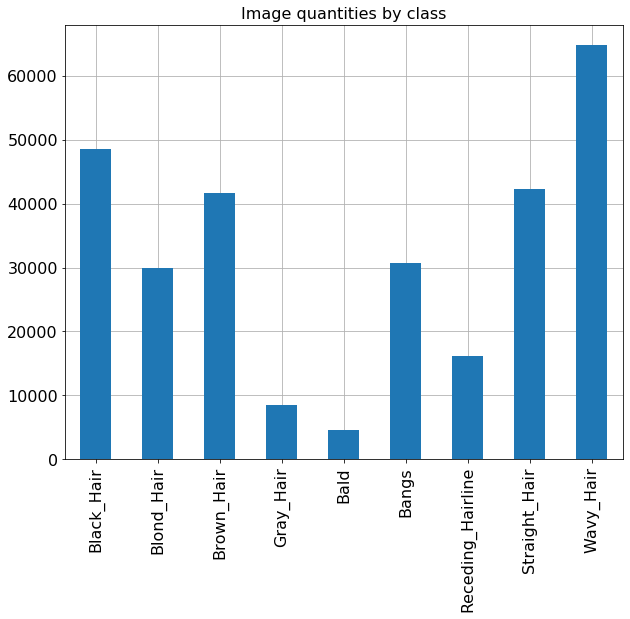

In [7]:
labels.replace(-1, 0).sum(axis=0)[hairstyle_attributes].plot.bar(grid=True, 
                                                                 zorder=2, 
                                                                 figsize=(10, 8), 
                                                                 fontsize=16)
plt.title("Image quantities by class", fontsize=16);

Now let's look at the random images from each of the classes

In [8]:
def show_random_grid(table, num=12, seed=None, title=None):
    if seed is not None:
        np.random.seed(seed)
    random_indices = np.random.permutation(len(table))[:num]
    real_num = len(random_indices)
    ncols = 4
    nrows = real_num // ncols + int((real_num % ncols) > 0)
    plt.figure(figsize=(18, 5 * nrows))
    for i in range(nrows):
        for j in range(ncols):
            plt.subplot(nrows, ncols, i * ncols + j + 1)
            _filename = table.iloc[random_indices[i * ncols + j]].name
            _image = plt.imread(os.path.join("../stargan/data/celeba/images", _filename))
            plt.imshow(_image)
            plt.axis("off")
    plt.gcf().subplots_adjust(top=0.95)

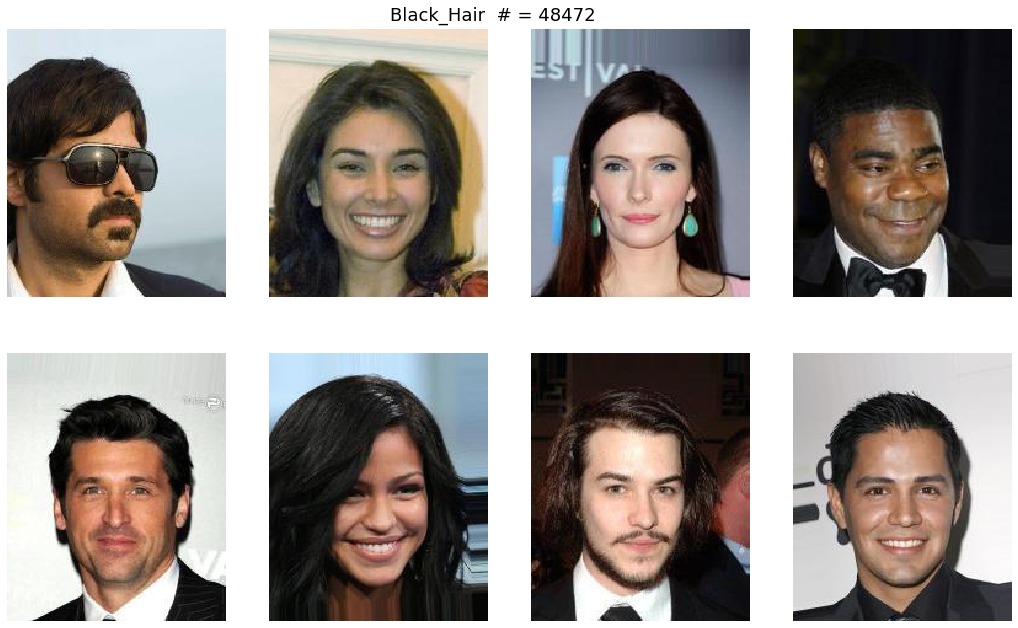

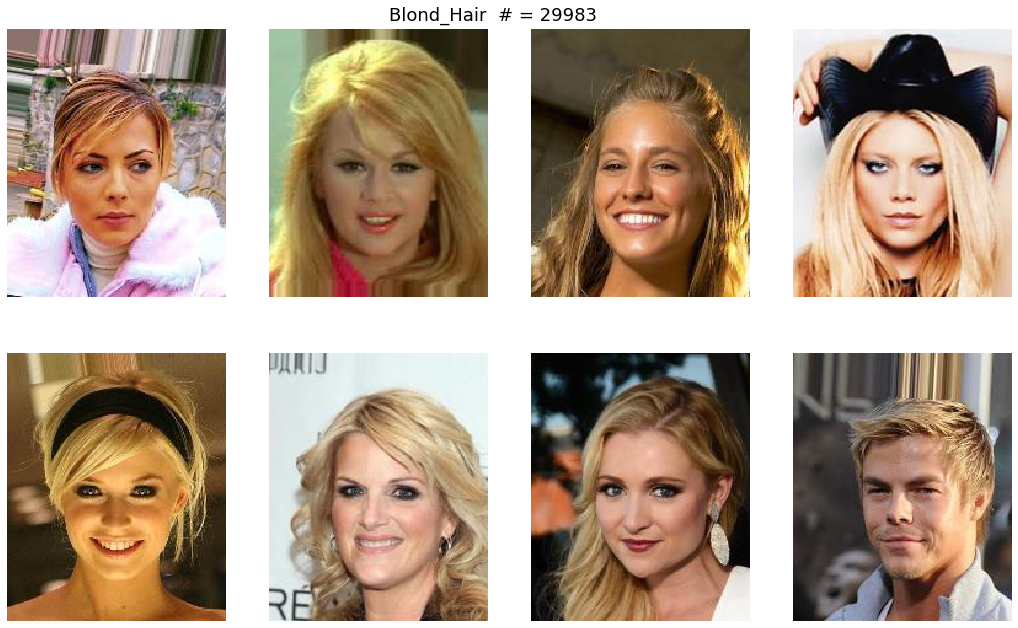

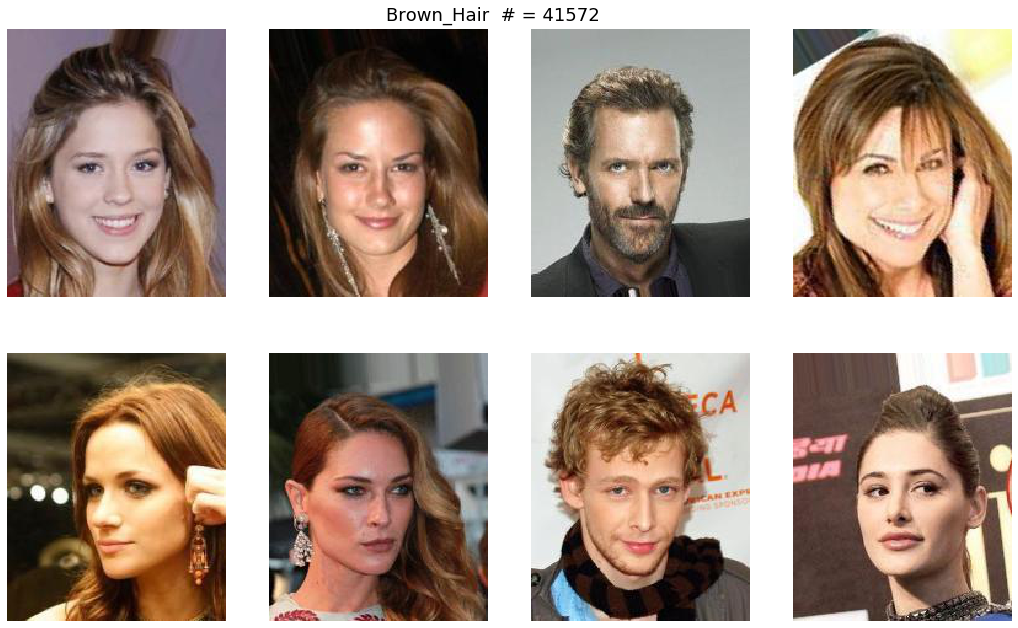

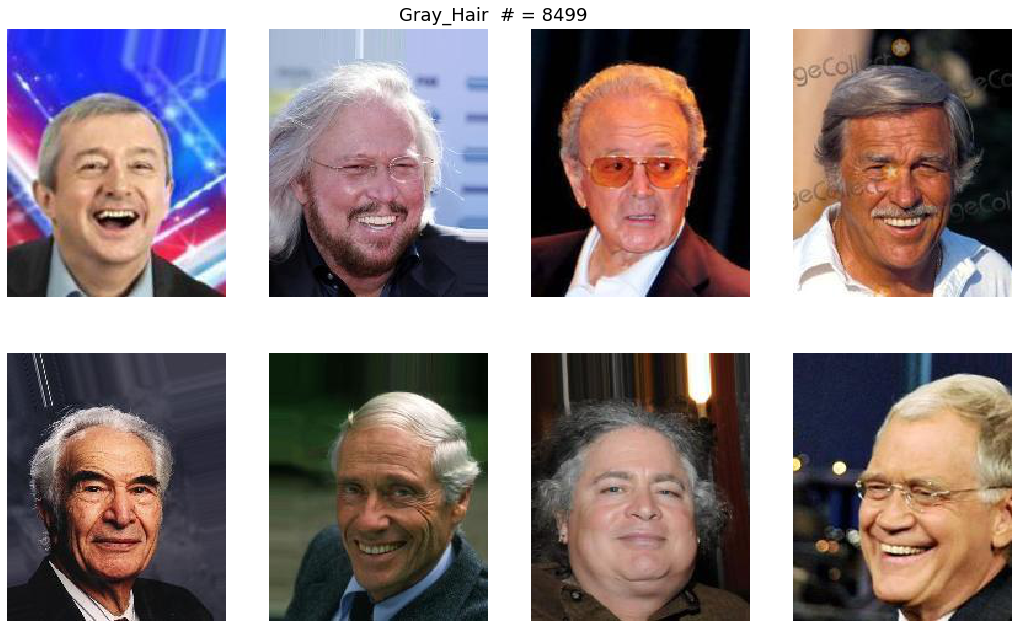

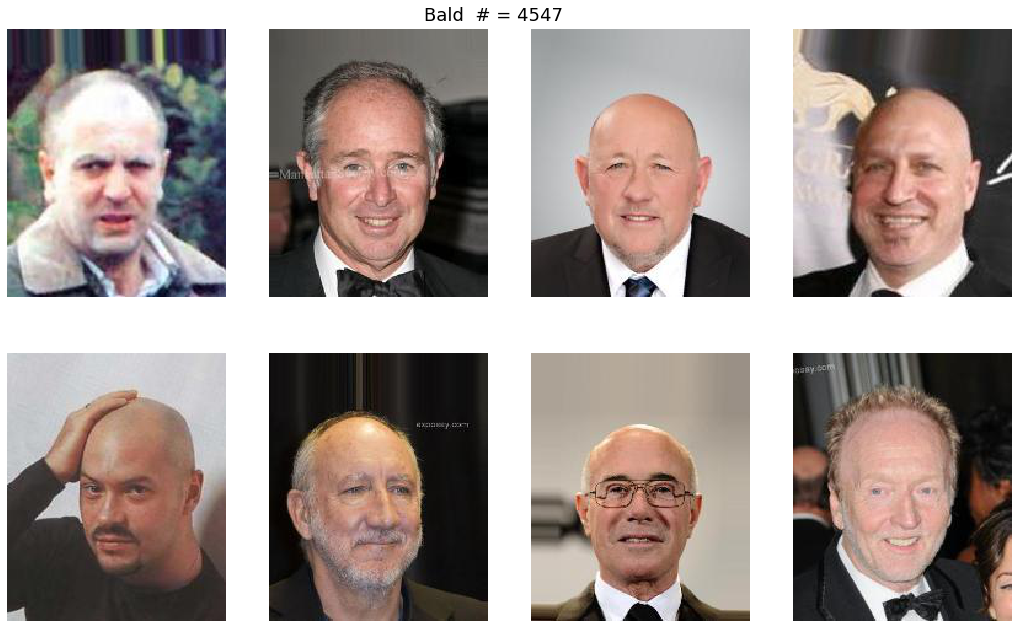

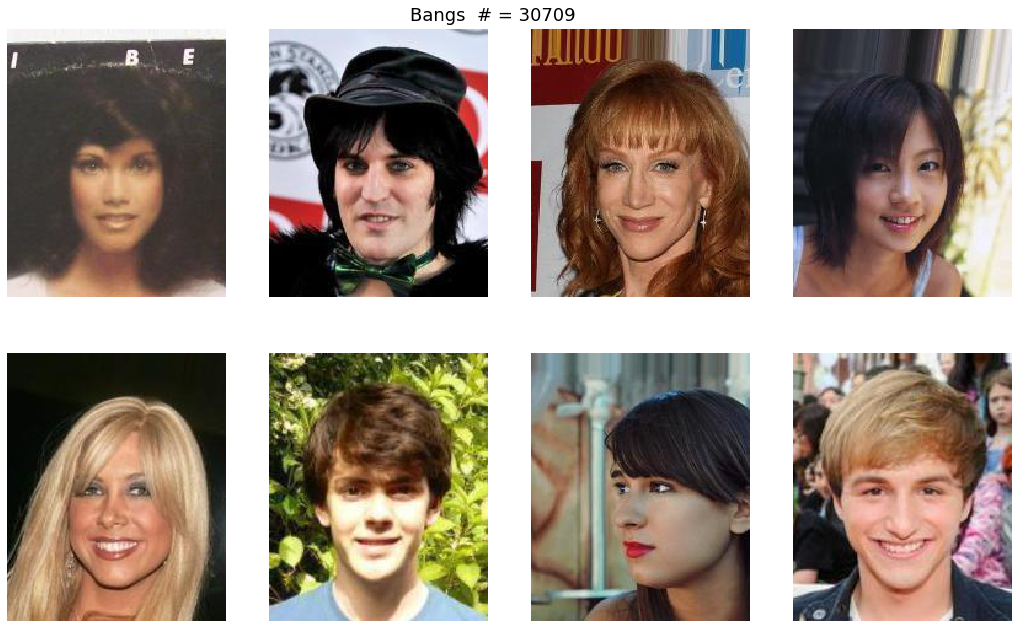

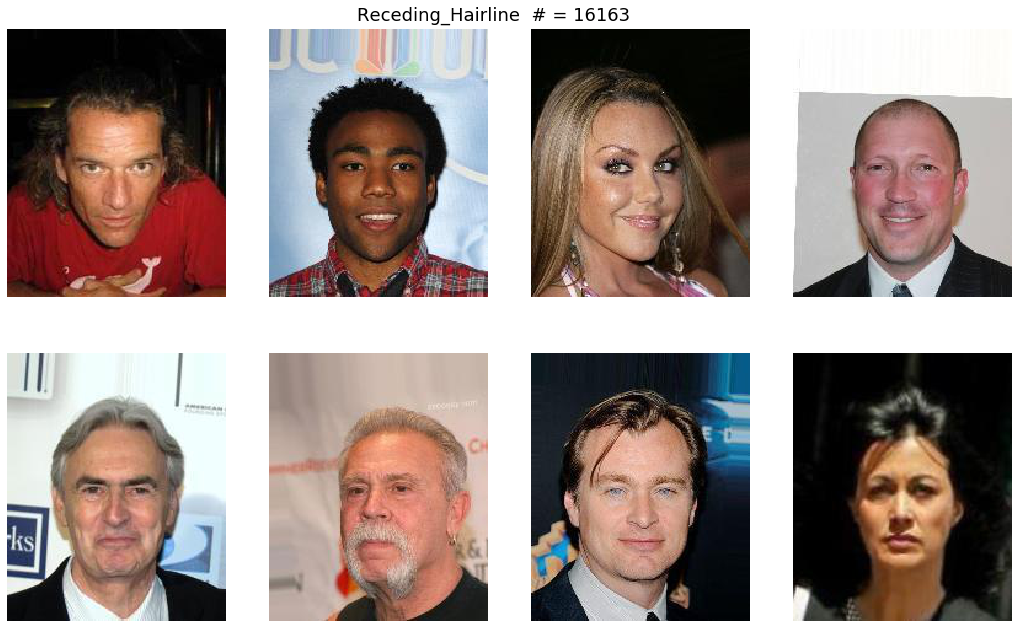

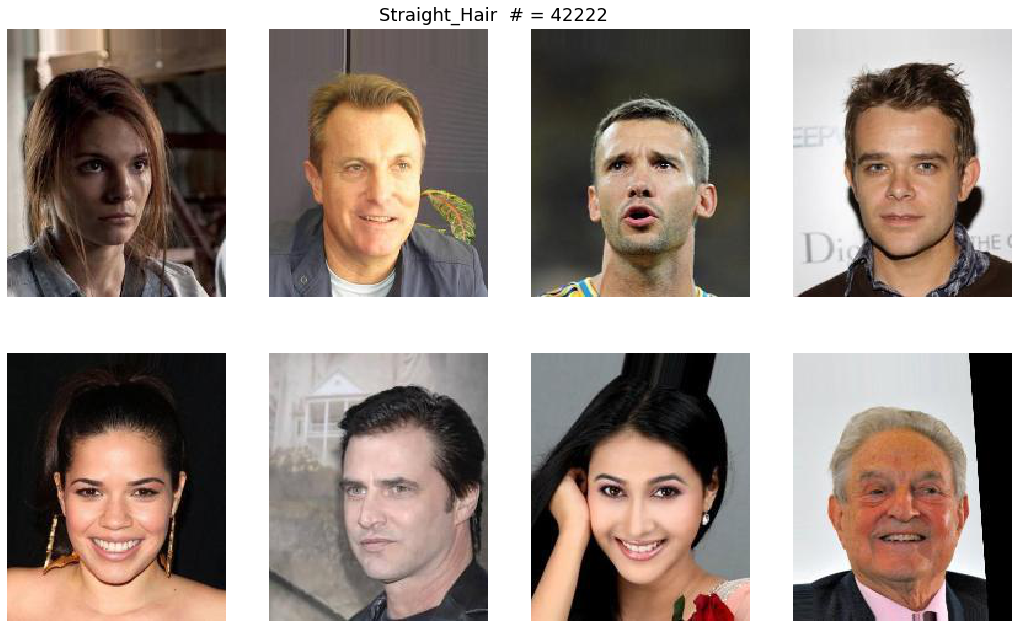

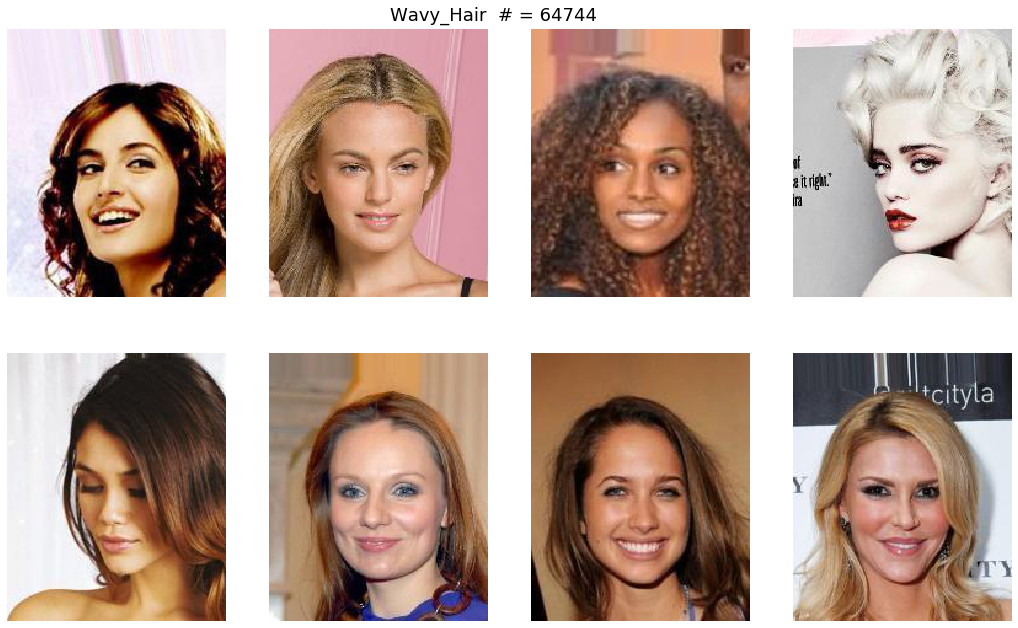

In [9]:
for i in range(len(hairstyle_attributes)):
    show_random_grid(labels[labels[hairstyle_attributes[i]] == 1], seed=10, num=8)
    plt.suptitle(f"{hairstyle_attributes[i]}  # = {(labels[hairstyle_attributes[i]] == 1).sum()}", size=18)
    plt.show()
    print("=========================================================" * 2)